In [ ]:
# ! pip install flair
# ! pip install emoji

In [1]:
import pandas as pd

import re
import string

import emoji

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('average_perception_tagger')
# nltk.download('wordnet')
# nltk.download('words') # if its needed

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [57]:
words = set(nltk.corpus.words.words())

def clean_tweets(text):
    text = re.sub(r'https.?://[^\s]+[\s]?', '', text)
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
     if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to
[nltk_data]     /Users/hannahbrown/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [59]:
tweet_data = pd.read_csv('data.csv')
tweet_data.head()

,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count
0,1551734038204923904,2022-07-26 00:59:59+00:00,$2.7 billion for climate change (slashing carb...,15,1,0,6
1,1551734021591269377,2022-07-26 00:59:55+00:00,@nathaliejacoby1 Climate change. The rise in t...,2,0,0,0
2,1551734013815029761,2022-07-26 00:59:53+00:00,@JacobsVegasLife @LasVegasLocally This is a ch...,8,0,1,0
3,1551733993740980224,2022-07-26 00:59:48+00:00,Climate Change and Energy Minister Chris Bowen...,18,0,8,5
4,1551733979316887554,2022-07-26 00:59:45+00:00,"@Thebs15800518 At 5:30, @SecGranHolm tries to ...",0,0,0,0


In [60]:
tweet_data = tweet_data.drop_duplicates()
tweet_data = tweet_data[tweet_data['tweet_id'] != 'tweet_id']
tweet_data.shape

(146069, 7)

In [61]:
df_clean = tweet_data.copy()

# make all tweet text lower case 
df_clean.tweet = df_clean.tweet.str.lower()

# remove any links from tweets 
df_clean.tweet = df_clean.tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

# remove mentions of other twitter users
df_clean.tweet = df_clean.tweet.apply(lambda x: re.sub(r'@\S+', '', x))

# remove new line 
df_clean.tweet = df_clean.tweet.apply(lambda x: re.sub(r'\n', '', x))

# remove any emojis
df_clean.tweet = df_clean.tweet.apply(lambda x: emoji.replace_emoji(x, replace=''))

In [62]:
# extract hashtags from tweet before removing punctuation 
df_clean['hashtags'] = df_clean.tweet.apply(lambda x: [word for word in x.split(' ') if word.startswith('#')])

In [63]:
# removes most punctuation
df_clean.tweet = df_clean.tweet.apply(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', x))

# remove white space 
df_clean.tweet = df_clean.tweet.apply(lambda x: x.strip())
df_clean.tweet = df_clean.tweet.apply(lambda x: ' '.join(x.split()))

In [64]:
df_clean.head()

,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count,hashtags
0,1551734038204923904,2022-07-26 00:59:59+00:00,2 7 billion for climate change slashing carbon...,15,1,0,6,[]
1,1551734021591269377,2022-07-26 00:59:55+00:00,climate change the rise in temperature will be...,2,0,0,0,[]
2,1551734013815029761,2022-07-26 00:59:53+00:00,this is a chilling podcast about what could ha...,8,0,1,0,[]
3,1551733993740980224,2022-07-26 00:59:48+00:00,climate change and energy minister chris bowen...,18,0,8,5,[]
4,1551733979316887554,2022-07-26 00:59:45+00:00,at 5 30 tries to hide the fact that biden bega...,0,0,0,0,"[#biden, #oil, #buildbackbetter]"


### Remove stop words

In [65]:
df_clean.tweet = df_clean.tweet.apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stopwords.words('english')]))
df_clean.head()

,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count,hashtags
0,1551734038204923904,2022-07-26 00:59:59+00:00,2 7 billion climate change slashing carbon emi...,15,1,0,6,[]
1,1551734021591269377,2022-07-26 00:59:55+00:00,climate change rise temperature bad enough sec...,2,0,0,0,[]
2,1551734013815029761,2022-07-26 00:59:53+00:00,chilling podcast could happen salt lake city g...,8,0,1,0,[]
3,1551733993740980224,2022-07-26 00:59:48+00:00,climate change energy minister chris bowen hit...,18,0,8,5,[]
4,1551733979316887554,2022-07-26 00:59:45+00:00,5 30 tries hide fact biden began signing legis...,0,0,0,0,"[#biden, #oil, #buildbackbetter]"


### Lemmatize

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

In [67]:
lemmatizer = WordNetLemmatizer()
df_clean.tweet = df_clean.tweet.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split(' ')]))
df_clean.head()

,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count,hashtags
0,1551734038204923904,2022-07-26 00:59:59+00:00,2 7 billion climate change slashing carbon emi...,15,1,0,6,[]
1,1551734021591269377,2022-07-26 00:59:55+00:00,climate change rise temperature bad enough sec...,2,0,0,0,[]
2,1551734013815029761,2022-07-26 00:59:53+00:00,chilling podcast could happen salt lake city g...,8,0,1,0,[]
3,1551733993740980224,2022-07-26 00:59:48+00:00,climate change energy minister chris bowen hit...,18,0,8,5,[]
4,1551733979316887554,2022-07-26 00:59:45+00:00,5 30 try hide fact biden began signing legisla...,0,0,0,0,"[#biden, #oil, #buildbackbetter]"


### Frequently used words

In [69]:
word_freq = defaultdict(int)
for sent in df_clean.tweet:
    sent = sent.split(' ')
    for i in sent:
        word_freq[i] += 1
len(word_freq)

80847

In [73]:
for word in sorted(word_freq, key=word_freq.get, reverse=True)[:20]:
    print(word, word_freq[word])

climate 140407
change 131842
amp 14043
climatechange 13398
people 12862
u 11487
like 9813
year 9280
world 8376
need 7743
one 7507
global 7341
would 6729
get 6692
time 6655
it’s 6277
think 6087
bill 6085
real 5969
make 5739


### Frequently used hashtags

In [71]:
all_hashtags = sum([tag.split('#') for tag in df_clean['hashtags'].sum()], [])
all_hashtags = [tag for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

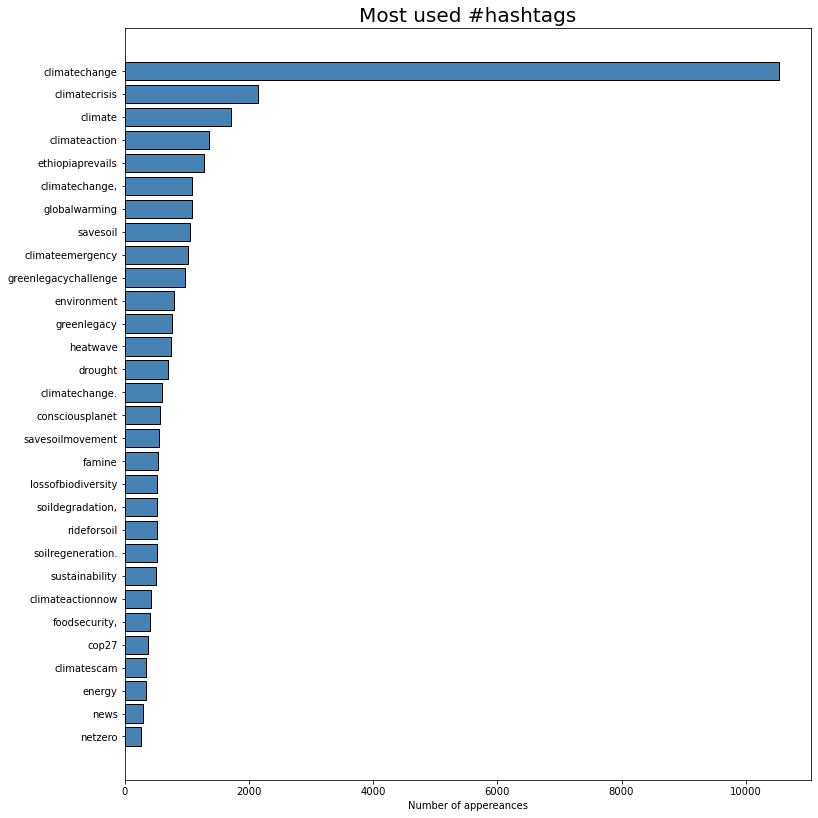

In [72]:
top_hashtags = Counter(all_hashtags).most_common(30)
top_tags = [x[0] for x in top_hashtags]
top_tags_freq = [x[1] for x in top_hashtags]

fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(top_tags))
ax.barh(y_pos ,list(top_tags_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(top_tags)[::-1])
ax.set_xlabel("Number of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)

### Sentiment model using flair 

In [74]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

2022-08-02 14:00:53,992 loading file /Users/hannahbrown/.flair/models/sentiment-en-mix-distillbert_4.pt


In [76]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
sent = tweet_data["tweet"][:100].apply(flair_prediction)

In [ ]:
# df_clean['sentiment'][:100] = sent

In [78]:
for i, tweet in enumerate(tweet_data['tweet'][:100][sent=='neg']): 
    print(i, tweet)

0 $2.7 billion for climate change (slashing carbon emissions); $37 billion for cops. Tell me again why republicans aren’t in love with Joe Biden? I mean, at least when it comes to this?
1 Climate Change and Energy Minister Chris Bowen has hit out at the “denial and delay” of the Liberal Party while accusing Opposition Leader Peter Dutton of trying to “continue the climate wars”.

https://t.co/suHcMguiSo
2 @Thebs15800518 At 5:30, @SecGranHolm tries to hide the fact that #Biden began signing legislation to shut down #oil production to fight climate change the second he took office 

Economy Reset - #BuildBackBetter 

https://t.co/kfC0Sr1gc0
3 https://t.co/5PGrER4z3b altered a news headline: https://t.co/IwzK7SGokG https://t.co/LyAPoqLQL1
4 The head of the UN calling out @IFAmedia @GlanbiaPlc @kerryfoodgroup @DairyIndustryIE @AgriAware.

85% of adults in Ireland are concerned about climate change. There's no time for deference to TDs who want to protect the frozen pizza, protein powder, i

In [44]:
# for row in df_clean[]['tweet']:
#     print(row)

for i, tweet in enumerate(tweet_data[df_clean['sentiment']=='pos']['tweet']): 
    print(i, tweet)

0 Anthony Albanese, the
Prime Minister of Australia: "Climate change is a global 'national security issue" 🙃 https://t.co/hym4MAtnhD
1 Scientific studies on climate change are as accurate as scientific studies on Covid! 
#ClimateScam
2 @StevePriceMedia @AusTodayListnr There is no climate change….
3 Remember back in 2020 when the "Wildfires due to Climate Change" knew where the US and Canada boarder was? https://t.co/8yt2i3GYKm
4 @lavern_spicer 1 million years of ice core samples are all the research you need to learn about climate change. 

Look it up. The truth is out there for the taking.
5 @JacobsVegasLife @LasVegasLocally This is a chilling podcast about what could happen to Salt Lake City if the Great Salt Lake dried up, but also what happens to the city and ecosystem when even smaller, incremental changes take shape: https://t.co/kBPTUJwE1M
6 @jlush709 @PaulDurdle yes and his approach helps to lessen the divide on the topic of climate change. He doesn't preach, he doesn't demand,

In [ ]:
tweet_data[df_clean['sentiment']=='pos']['tweet']